In [1]:
from fenics import *
set_log_level(50)

In [2]:
# Scaled variables
L = 1
W = 0.2
mu = 1
rho = 1
delta = W/L
gamma = 0.4*delta**2
beta = 1.25
lambda_ = beta
g = gamma

In [3]:
# Create mesh and define function space
mesh = Mesh()
i = 1
toll = 0.6
err_u = 1
u_pre = 0

In [4]:
# Define strain and stress
    
def epsilon(u):
    return sym(grad(u))

def sigma(u):
    return lambda_*div(u)*Identity(d) + 2*mu*epsilon(u)

f = Constant(( 0, -rho))
T = Constant((0, 0)) 
d = 2  # space dimension  

In [7]:
clamped_boundary = CompiledSubDomain("on_boundary && near(x[0], 0, tol)", tol=1e-14)

In [8]:
mesh = RectangleMesh(Point(0, 0), Point(1, W), 2, 1)
V = VectorFunctionSpace(mesh, 'P', 1)

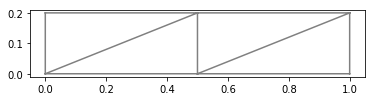

In [11]:
plot(mesh)

In [12]:
# Define boundary condition    
bc = DirichletBC(V, Constant((0, 0)), clamped_boundary)

In [13]:
# Define variational problem
u = TrialFunction(V)    
v = TestFunction(V)    
a = inner(sigma(u), epsilon(v))*dx
L = dot(f, v)*dx + dot(T, v)*ds

In [15]:
# Compute solution
u_sol = Function(V)
solve(a == L, u_sol, bc)
err_u = abs(u_sol(1, 0)[1] - u_pre)
u_pre = u_sol(1, 0)[1]

In [16]:
print("tip displcement", u_sol(1, 0)[1])
print("err-----------", err_u)

tip displcement -1.8575308009346017
err----------- 1.8575308009346017


In [17]:
b = assemble(action(a,u_sol))

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [20]:
b[:]

array([-5.00000000e-01,  2.58613365e-01,  5.00000000e-01, -1.08613365e-01,
        1.38777878e-16, -5.00000000e-02, -8.32667268e-17, -5.00000000e-02,
       -1.56125113e-16, -3.33333333e-02,  3.19189120e-16, -1.66666667e-02])

In [22]:
c = assemble(L)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [25]:
c[:]

array([ 0.        , -0.01666667,  0.        , -0.03333333,  0.        ,
       -0.05      ,  0.        , -0.05      ,  0.        , -0.03333333,
        0.        , -0.01666667])

In [26]:
c.sum()

-0.20000000000000007

In [27]:
b.sum()

1.734723475976807e-17

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


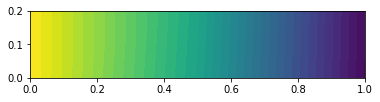

In [29]:
plot(u_sol[1])

In [30]:
c = assemble(a)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [37]:
import numpy as np
np.array(c)

array(<dolfin.cpp.la.Matrix object at 0x7f73c4b95f10>, dtype=object)

In [41]:
t=Function(V)

In [44]:
t.vector().vec().array[:]=np.array([1., 0., 4., 0., 0., 7., 0., 0., 4., 0., 0., 0.])

Calling FFC just-in-time (JIT) compiler, this may take some time.


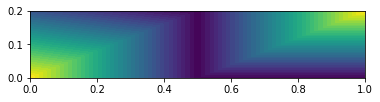

In [47]:
plot(t[0])